This project is a practice of pocket PLA. The project will use the iris dataset. However, for the convenience and better visualization, I'll only select 2 kinds of flowers, and 2 features.

In [1]:
# import the libraries
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
# import the datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# read the dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [4]:
# check the shape of the dataset
df.shape

(150, 5)

In [5]:
# Select 2 kinds of flowers
binary_df = df[df['target']<2]

In [6]:
# Make sure that there's only two kinds of flowers
set(binary_df['target'])

{0, 1}

In [7]:
# Select two features
new_df = binary_df[['sepal length (cm)','petal length (cm)','target']]
new_df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [8]:
# X and y
X = new_df[['sepal length (cm)','petal length (cm)']].values
y = new_df['target'].values

In [9]:
X[:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Transform y=0 into y=-1
y = np.where(y==0, -1, 1)

In [12]:
# implement the pocket pla algorithm
def pocket_pla(X,y,iterations):
    # Initialize the wieghts to zero
    w = np.zeros(X.shape[1] + 1)
    # pocket_w is for storing the current best w
    pocket_w = np.copy(w)
    # best_error is the minimum number of errors (start with a large number)
    best_error = np.inf

    for _ in range(iterations):
        for i in range(len(X)):
            # if the sign is wrong with the labels
            if np.sign(np.dot(X[i],w[1:]) + w[0]) != y[i]:
                # update the weights
                w[1:] = w[1:] + y[i]*X[i]
                w[0] += y[i]
                # calculate error
                error = sum(np.sign(np.dot(X,w[1:]) + w[0]) != y)
                # if current error is less than the best error, update the pocket
                if error < best_error:
                    best_error = error
                    pocket_w = np.copy(w)
    return pocket_w

In [13]:
# Set the number of iterations
iterations = 1000

In [14]:
# Start the algorithm
optimal_weights = pocket_pla(X, y, iterations)
optimal_weights

array([-2. , -3.4,  9.1])

In [15]:
# Data visualization
import matplotlib.pyplot as plt

def plotting(X, y, weights):
    # Set min and max for the axis
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    plt.figure(figsize=(10,6))
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color = 'blue', label = 'Category 1')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color = 'red', label = 'Category 2')

    # Calculate the decision boundary
    slope = -weights[1] / weights[2]
    intercept = -weights[0]/weights[2]

    # Plot the decision boundary
    x_decision = np.linspace(min(X[:,0]), max(X[:,0]), 100)
    y_decision = slope * x_decision + intercept
    plt.plot(x_decision, y_decision, color = 'green', label = 'Decision Boundary')

    # Additional setting
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Classification of Iris')
    plt.legend()
    plt.grid(True)
    plt.show()

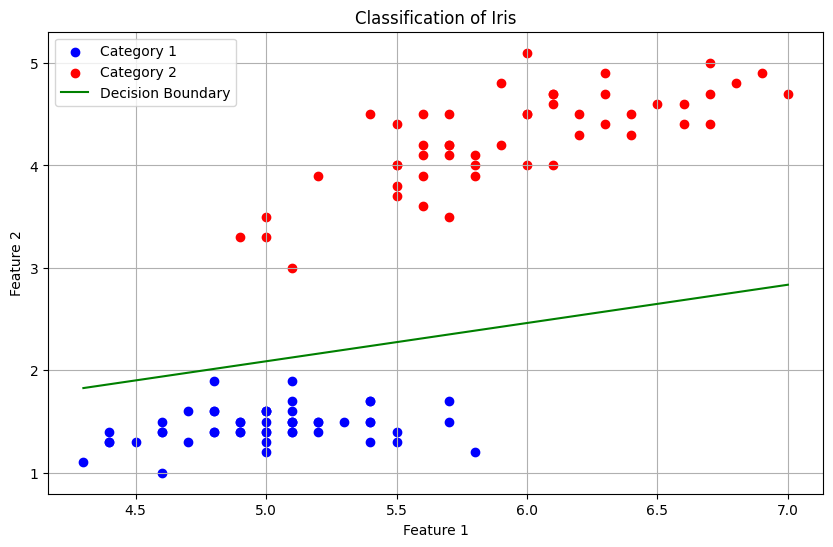

In [16]:
plotting(X,y,optimal_weights)